In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(42)
values = np.random.rand(100)

In [5]:
labels = []
for i in values[:50]:
   if i <=0.5:
       labels.append('Class1')
   else:
       labels.append('Class2')

In [6]:
labels += [None] * 50

In [7]:
print(labels)

['Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', 'Class2', 'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class1', 'Class1', 'Class2', 'Class1', 'Class1', 'Class1', 'Class1', 'Class2', 'Class1', 'Class2', 'Class1', 'Class2', 'Class2', 'Class1', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [8]:
data = {
    "Point": [f"x{i+1}" for i in range(100)],
    "Value": values,
    "Label": labels
 }

In [9]:
df=pd.DataFrame(data)

In [10]:
df.head()

,Point,Value,Label
0,x1,0.374540,Class1
1,x2,0.950714,Class2
2,x3,0.731994,Class2
3,x4,0.598658,Class2
4,x5,0.156019,Class1


In [12]:
 variable_meaning = {
 "Point": "The point number",
 "Value": "The value of the point",
 "Label": "The class of the point"
 }
 variable_df = pd.DataFrame(list(variable_meaning.items()), columns=["Feature", "Description"])
 print("\nVariable Meaning Table:")
 print(variable_df)


Variable Meaning Table:
  Feature             Description
0   Point        The point number
1   Value  The value of the point
2   Label  The class of the point


In [13]:
df.nunique()

,0
Point,100
Value,100
Label,2


In [15]:
df.shape

(100, 3)

In [17]:
print("\nBasic Information about Dataset: ")
df.info()


Basic Information about Dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Point   100 non-null    object 
 1   Value   100 non-null    float64
 2   Label   50 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [18]:
print("\nSummary Statistics: ")
df.describe().T


Summary Statistics: 


,count,mean,std,min,25%,50%,75%,max
Value,100.0,0.470181,0.297489,0.005522,0.193201,0.464142,0.730203,0.986887


In [20]:
print("\nMissing Values in Each Column:")
df.isnull().sum()


Missing Values in Each Column:


,0
Point,0
Value,0
Label,50


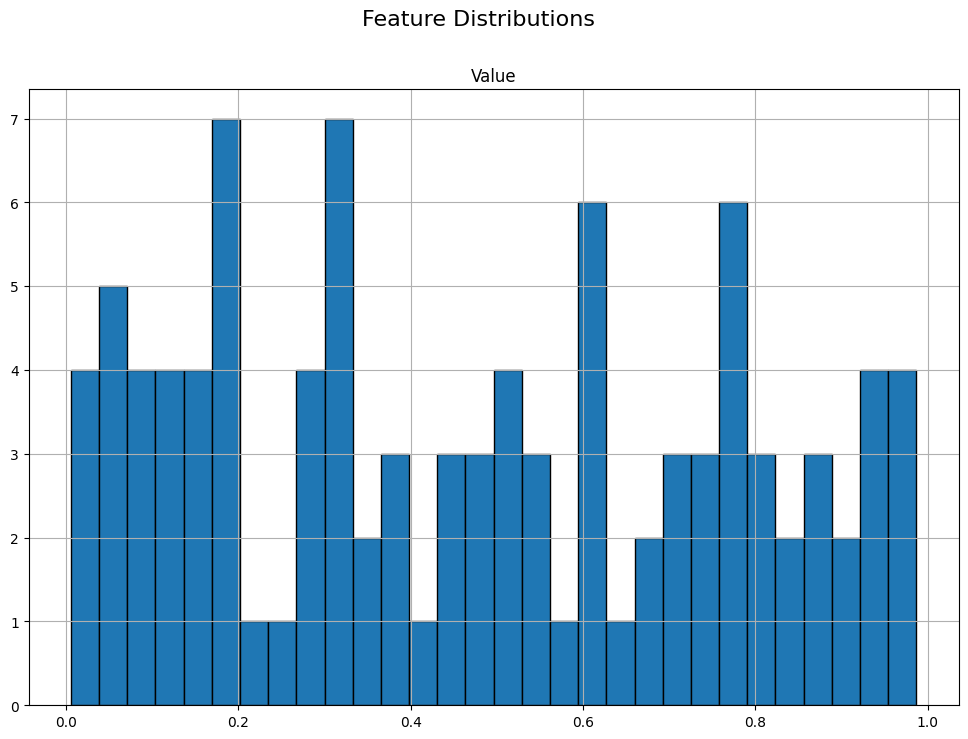

In [22]:
num_col = df.select_dtypes(include=['int', 'float']).columns
df[num_col].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [23]:
 labeled_df = df[df["Label"].notna()]
 X_train = labeled_df[["Value"]]
 y_train = labeled_df["Label"]

In [25]:
unlabeled_df = df[df["Label"].isna()]
X_test = unlabeled_df[["Value"]]

In [26]:
true_labels = ["Class1" if x <= 0.5 else "Class2" for x in values[50:]]

In [27]:
 k_values = [1, 2, 3, 4, 5, 20, 30]
 results = {}
 accuracies = {}

In [29]:
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  predictions = knn.predict(X_test)
  results[k] = predictions
  accuracy = accuracy_score(true_labels, predictions) * 100
  accuracies[k] = accuracy
  print(f"Accuracy for k={k}: {accuracy:.2f}%")
  unlabeled_df[f"Label_k{k}"] = predictions

Accuracy for k=1: 100.00%
Accuracy for k=2: 100.00%
Accuracy for k=3: 98.00%
Accuracy for k=4: 98.00%
Accuracy for k=5: 98.00%
Accuracy for k=20: 98.00%
Accuracy for k=30: 100.00%


In [30]:
print(predictions)

['Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class1'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class1' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class2' 'Class2' 'Class2' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class1'
 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class2' 'Class1'
 'Class1' 'Class1']


In [31]:

 df1 = unlabeled_df.drop(columns=['Label'], axis=1)
 df1

,Point,Value,Label_k1,Label_k2,Label_k3,Label_k4,Label_k5,Label_k20,Label_k30
50,x51,0.969585,Class2,Class2,Class2,Class2,Class2,Class2,Class2
51,x52,0.775133,Class2,Class2,Class2,Class2,Class2,Class2,Class2
52,x53,0.939499,Class2,Class2,Class2,Class2,Class2,Class2,Class2
53,x54,0.894827,Class2,Class2,Class2,Class2,Class2,Class2,Class2
54,x55,0.597900,Class2,Class2,Class2,Class2,Class2,Class2,Class2
55,x56,0.921874,Class2,Class2,Class2,Class2,Class2,Class2,Class2
56,x57,0.088493,Class1,Class1,Class1,Class1,Class1,Class1,Class1
57,x58,0.195983,Class1,Class1,Class1,Class1,Class1,Class1,Class1
58,x59,0.045227,Class1,Class1,Class1,Class1,Class1,Class1,Class1
59,x60,0.325330,Class1,Class1,Class1,Class1,Class1,Class1,Class1
